<a target="_blank" href="https://colab.research.google.com/github/luisferdev11/MarcianosInsanos/blob/main/server/notebookArucos/arucos.ipynb">
  <img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/>
</a>

## Obtener las imagenes de prueba

In [3]:
import requests
from PIL import Image
from io import BytesIO
import os

def download_image(url, save_path):
    response = requests.get(url)
    img = Image.open(BytesIO(response.content))
    img.save(save_path)

# Lista de URLs de las imágenes en GitHub
image_urls = [
    'https://github.com/luisferdev11/MarcianosInsanos/raw/main/server/notebookArucos/arucosample.jpg',
    'https://github.com/luisferdev11/MarcianosInsanos/raw/main/server/notebookArucos/images.jpeg',
    'https://github.com/luisferdev11/MarcianosInsanos/raw/main/server/notebookArucos/InputImage.jpg',
    'https://github.com/luisferdev11/MarcianosInsanos/raw/main/server/notebookArucos/otroaruco.jpeg'
]

# Crear una carpeta para guardar las imágenes descargadas
os.makedirs('images', exist_ok=True)

# Descargar y guardar todas las imágenes
for i, url in enumerate(image_urls):
    download_image(url, f'images/image_{i}.jpeg')

# Mostrar una de las imágenes como ejemplo
img = Image.open('images/image_0.jpeg')
img.show()


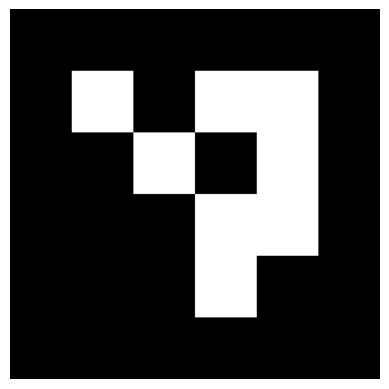

In [1]:
import cv2
import matplotlib.pyplot as plt

# Cambiando el aruco DICT es diferente el formato
# dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_6X6_250)
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)

marker_id = 0 #id a generar
marker_size = 2000 #resolucion
marker_image = cv2.aruco.generateImageMarker(dictionary, marker_id, marker_size)

# Guarda la imagen del marcador ArUco
cv2.imwrite("marker.png", marker_image)

plt.imshow(marker_image, cmap='gray')
plt.axis('off')
plt.show()

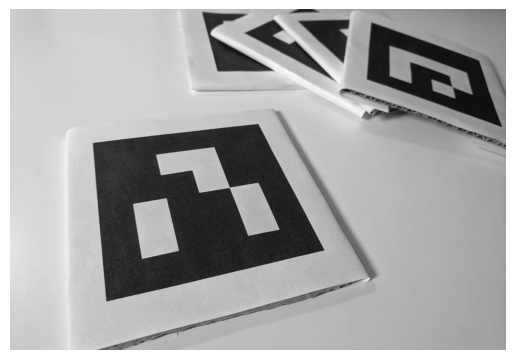

Coordenadas del marcador con ID 3 :
Esquina 1 : [1825. 1400.]
Esquina 2 : [ 560. 1695.]
Esquina 3 : [480. 779.]
Esquina 4 : [1442.  668.]
Coordenadas del marcador con ID 1 :
Esquina 1 : [2096.   80.]
Esquina 2 : [2721.  299.]
Esquina 3 : [2857.  684.]
Esquina 4 : [2070.  407.]


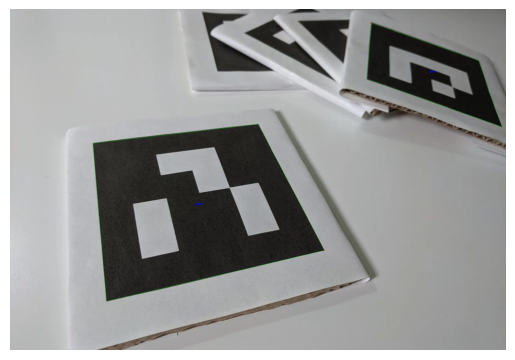

In [2]:
import cv2
import matplotlib.pyplot as plt

# Carga la imagen en la que quieres detectar el marcador
# image = cv2.imread("InputImage.jpg") 
# image = cv2.imread("images.jpeg")
image = cv2.imread("images/image_0.jpeg")
# image = cv2.imread("otroaruco.jpeg")

# Convierte la imagen a escala de grises
gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
plt.imshow(gray, cmap='gray')
plt.axis('off')
plt.show()

# Carga el diccionario de marcadores ArUco
dictionary = cv2.aruco.getPredefinedDictionary(cv2.aruco.DICT_4X4_250)

# Detecta los marcadores en la imagen
corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, dictionary)

# Si se detectan marcadores, imprime los IDs
if ids is not None:
  # Dibuja un borde verde alrededor de cada marcador detectado
  cv2.aruco.drawDetectedMarkers(image, corners, ids, borderColor=(0, 255, 0)) 

  # Imprime las coordenadas de las esquinas de cada marcador
  for i in range(len(ids)):
    print("Coordenadas del marcador con ID", ids[i][0], ":")
    for j in range(4):
      print("Esquina", j+1, ":", corners[i][0][j])

  # Muestra la imagen con los bordes dibujados
  plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
  plt.axis('off')
  plt.show()
else:
  print("No se detectaron marcadores, por lo que no se pueden dibujar bordes.")

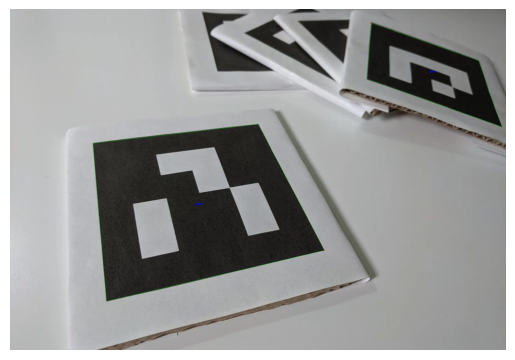

{'num_arucos': 2, 'arucos': [{'id': 3, 'coords': {'1': [1825.0, 1400.0], '2': [560.0, 1695.0], '3': [480.0, 779.0], '4': [1442.0, 668.0]}, 'type_aruco': 'DICT_4X4_1000'}, {'id': 1, 'coords': {'1': [2096.0, 80.0], '2': [2721.0, 299.0], '3': [2857.0, 684.0], '4': [2070.0, 407.0]}, 'type_aruco': 'DICT_4X4_1000'}]}


In [2]:
import cv2
import matplotlib.pyplot as plt

# Diccionario completo de tipos de ArUco
ARUCO_DICT = {
    "DICT_4X4_1000": cv2.aruco.DICT_4X4_1000,
    "DICT_5X5_1000": cv2.aruco.DICT_5X5_1000,
    "DICT_6X6_1000": cv2.aruco.DICT_6X6_1000,
    "DICT_7X7_1000": cv2.aruco.DICT_7X7_1000,
    "DICT_ARUCO_ORIGINAL": cv2.aruco.DICT_ARUCO_ORIGINAL
}

def detect_arucos(image_path):
    # Cargar la imagen
    image = cv2.imread(image_path)
    if image is None:
        print(f"Error al cargar la imagen: {image_path}")
        return None

    # Convertir la imagen a escala de grises
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)

    # Crear el diccionario de resultado
    result = {
        'num_arucos': 0,
        'arucos': []
    }

    # Iterar sobre todos los diccionarios de ArUco
    for dict_name, dict_value in ARUCO_DICT.items():
        # Cargar el diccionario de marcadores ArUco
        dictionary = cv2.aruco.getPredefinedDictionary(dict_value)

        # Detectar los marcadores en la imagen
        corners, ids, rejectedImgPoints = cv2.aruco.detectMarkers(gray, dictionary)

        if ids is not None:
            for i in range(len(ids)):
                aruco_info = {
                    'id': int(ids[i][0]),
                    'coords': {
                        '1': corners[i][0][0].tolist(),
                        '2': corners[i][0][1].tolist(),
                        '3': corners[i][0][2].tolist(),
                        '4': corners[i][0][3].tolist()
                    },
                    
                    'type_aruco': dict_name
                }
                result['arucos'].append(aruco_info)

            # Dibujar los bordes alrededor de los marcadores detectados
            cv2.aruco.drawDetectedMarkers(image, corners, ids, borderColor=(0, 255, 0))

    # Acomodo del diccionario
    result['arucos'] = sorted(result['arucos'], key=lambda x: (x['type_aruco']), reverse=True)
    result['num_arucos'] = len(result['arucos'])

    # Mostrar la imagen con los bordes dibujados
    plt.imshow(cv2.cvtColor(image, cv2.COLOR_BGR2RGB))
    plt.axis('off')
    plt.show()

    return result

# Ejemplo de uso
image_path = 'images/image_0.jpeg'
print(detect_arucos(image_path))